# Plotting CESM Data on an Unstructured Grid using `Geoviews` and `Datashader`

This week, during Xdev office hours, [Steve Yeager](https://staff.ucar.edu/users/yeager) raised a question regarding plotting unstructured grid data within Python. He was interested in plotting output from the [Community Atmosphere Model](https://www.cesm.ucar.edu/models/atm-cam/#:~:text=The%20Community%20Earth%20System%20Model,Department%20of%20Energy%20(DOE).), which supports unstructured grids, essentially a combination of triangles allowing for higher resolution in certain parts of the domain. This can be adventageous when wanting to achieve the benefits of high resolution within the primary domain, while maintaining the global scale of the model. This week, [NCAR Science](https://twitter.com/NCAR_Science/status/1425583582819483652?s=20) tweeted a great explanation of how revolutionary this capability is in the context of resolving processes over Greenland.

Unstructured grids can be difficult to plot directly within Python since they do not follow the typical `lat`, `lon` (x, y) convention. There is some preprocessing that needs to be applied before plotting.

The two main points include:
* Calculating the vertices
* Triangulating the vertices

Fortunately, `SciPy` and `Datashader` provide utilities for this! We can also use `GeoViews`/`Holoviews` to interactively look at the data.

## Imports
The main packages we will use here (outside of the "core" scientific packages), include:

### Datashader

From the [datashader documention](https://datashader.org/index.html):

*"Datashader is a graphics pipeline system for creating meaningful representations of large datasets quickly and flexibly. Datashader breaks the creation of images into a series of explicit steps that allow computations to be done on intermediate representations. This approach allows accurate and effective visualizations to be produced automatically without trial-and-error parameter tuning, and also makes it simple for data scientists to focus on particular data and relationships of interest in a principled way."*

### Holoviews
From the [holoviews documentation](https://holoviews.org/):

*"HoloViews is an open-source Python library designed to make data analysis and visualization seamless and simple. With HoloViews, you can usually express what you want to do in very few lines of code, letting you focus on what you are trying to explore and convey, not on the process of plotting."*

### Geoviews
From the [geoviews documentation](https://geoviews.org/index.html)

*"GeoViews is a Python library that makes it easy to explore and visualize geographical, meteorological, and oceanographic datasets, such as those used in weather, climate, and remote sensing research.

GeoViews is built on the HoloViews library for building flexible visualizations of multidimensional data. GeoViews adds a family of geographic plot types based on the Cartopy library, plotted using either the Matplotlib or Bokeh packages. With GeoViews, you can now work easily and naturally with large, multidimensional geographic datasets, instantly visualizing any subset or combination of them, while always being able to access the raw data underlying any plot"*

You can install these packages by using the following:

```bash
conda install -c conda-forge datashader holoviews geoviews
```

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
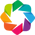

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
from scipy.spatial import Delaunay
import cartopy.crs as ccrs

import datashader as ds
from datashader import transfer_functions as tf
from datashader import reductions as rd
import datashader.utils as du

import holoviews as hv
import geoviews as gv
from holoviews.operation.datashader import regrid, datashade, rasterize
import geoviews.feature as gf
hv.extension("bokeh")

## Read in the data

In this case, we are using test data provided by Steve Yeager

In [2]:
data = xr.open_dataset('/glade/scratch/yeager/TREFHT_CAMne120.nc')

Notice within this dataset, both `lat` and `lon` have the same dimension, `ncol`

In [3]:
data

<xarray.Dataset>
Dimensions:    (time: 1, ncol: 777602, nbnd: 2)
Coordinates:
  * time       (time) object 0021-02-01 00:00:00
Dimensions without coordinates: ncol, nbnd
Data variables:
    TREFHT     (time, ncol) float32 ...
    area       (ncol) float64 ...
    lat        (ncol) float64 ...
    lon        (ncol) float64 ...
    time_bnds  (time, nbnd) object ...
Attributes: (12/14)
    np:               4
    ne:               120
    Conventions:      CF-1.0
    source:           CAM
    case:             B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02
    title:            UNSET
    ...               ...
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     B.E.13.B1850C5.ne120_t12.sehires38.003.cam.i.0021-01-01...
    topography_file:  /home/export/online1/xwan/cesm/inputdata/atm/cam/topo/U...
    NCO:              netCDF Operators version 4.9.5 (Homepage = http://nco.s...
    history:          Sat Aug  7 08:23:11 2021: ncks -d time,0 B.E.13.B1850C5...

We can use the first time here

In [4]:
data = data.isel(time=0)

## Setup the `traiangulate` function, described in the [`datashader.Trimesh`](https://datashader.org/user_guide/Trimesh.html) documentation
We can use the `Delaunay` triangulation function from `scipy.spatial` to calculate the vertices from our latitudes and longitudes

In [5]:
def triangulate(vertices, x="Longitude", y="Latitude"):
    """
    Generate a triangular mesh for the given x,y,z vertices, using Delaunay triangulation.
    For large n, typically results in about double the number of triangles as vertices.
    """
    triang = Delaunay(vertices[[x,y]].values)
    print('Given', len(vertices), "vertices, created", len(triang.simplices), 'triangles.')
    return pd.DataFrame(triang.simplices, columns=['v0', 'v1', 'v2'])

### Apply this function to our dataset
We extract our lats, lons, and value (`TREFHT` aka `temp` ) from the dataset, and stack them together

In [6]:
x = ((data.lon- 180) % 360) - 180
y = data.lat
temp = data.TREFHT
pts = np.stack((x, y, temp)).T

Now that we have our values, we can add them to a `pandas.Dataframe` which will make it easier to deal with

In [7]:
verts = pd.DataFrame(pts, columns=['Longitude', 'Latitude', 'temp'])

Finally, we input these vertices into the `triangulate` function we created earlier

In [8]:
tris = triangulate(verts)

Given 777602 vertices, created 1553762 triangles.


## Plot the result using `Datashader` + `Geoviews`/`Holoviews`

Now that we have both our `triangulations` and `vertices`, we can input this into the `geoviews.TriMesh` function.  We add a label for this plot, and a coordinate reference system.

Wrapping that within `rasterize` will ensure that we do not read in the entire meshgrid at once; but rather, render the image as neccessary.

In the second line, we specify the output options (`opts`) including:
* Add a colorbar
* Use the `magma` colormap
* Use an `800 x 400` size
* Transform to a `Robinson` projection

After we set those options for the `Trimesh` object, we use `geoviews.features` to add in coastlines and borders

The result is an interactive map! Feel free to use the `Bokeh` toolbar on the right to zoom in, move around, and examine the dataset

In [9]:
trimesh = rasterize(gv.TriMesh((tris,hv.Points(verts, vdims='temp')), label="Reference height temperature (K)", crs=ccrs.PlateCarree()), aggregator=ds.mean('temp'))

(trimesh).opts(colorbar=True, cmap='magma', width=800, height=400, projection=ccrs.Robinson()) * gf.coastline * gf.borders

:DynamicMap   []
   :Overlay
      .Image.Reference_height_temperature_left_parenthesis_K_right_parenthesis :Image   [Longitude,Latitude]   (Longitude_Latitude temp)
      .Coastline.I                                                             :Feature   [Longitude,Latitude]
      .Borders.I                                                               :Feature   [Longitude,Latitude]

## Conlcusion
The open-source Python plotting stack, specifically packages such as `Datashader` and `Geoviews`, can be quite powerful when plotting unstructured grids. I encourage you to check out the [Geoviews Gallery](https://geoviews.org/gallery/index.html) as well as the [Trimesh section of the Datashader Documentation](https://datashader.org/user_guide/Trimesh.html)! Happy plotting!